# Projeto 1 - José Antônio Bechara

### O ingresso na União Europeia contribuiu para a melhoria na qualidade de vida (IDH) e economia (PIB) dos países membros ? 

#### Por meio do PIB per Capta e o Índice de Desenvolvimento Humano podemos analisar a melhora na qualidade de vida e na economia dos paises membros da UE, comparando os países que ingressaram mais recentemente podemos observar seus dados antes de depois do ingresso e assim determinar se houve de fato impacto neles.

### Países a serem analisados:

### Cyprus
### Czech Republic
### Estonia
### Hungary
### Latvia
### Lithuania
### Malta
### Poland
### Slovakia
### Slovenia

### Ano de ingresso: 2004

### Links dos dados:
https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS
<br>
https://hdr.undp.org/en
<br>
http://gapm.io/dgdppc

### Link para o GitHub:
https://github.com/JoseBechara/Projeto-1---2019.2.git

---

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import math as math
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
#Leitura dos arquivos em Excel
IDH = pd.read_excel('Indicator_HDI.xlsx')
PIB = pd.read_excel('GDPpercapita.xlsx')
Imports = pd.read_excel('imports_percent_of_gdp.xlsx')

### Países membros da UE

In [3]:
UE = ["Austria", "Belgium", "Bulgaria", "Croatia", 
      "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland",
      "France", "Germany", "Greece", "Hungary", "Ireland",
      "Italy", "Latvia", "Lithuania", "Luxemburgo", "Malta",
      "Netherlands", "Poland", "Portugal", "Romania", "Slovak Republic",
      "Slovenia", "Spain", "Sweden", "United Kingdom"]

## IDH

In [4]:
IDH.head()

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


## PIB

In [5]:
PIB.head()

,Income per person (fixed 2000 US$),1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1313.722725,1381.040832,1454.022854,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1915.424459,1965.707230
4,Algeria,1280.384828,1085.414612,855.947986,1128.41578,1170.323896,1215.015783,1127.614288,1200.558225,1291.863983,...,1871.921986,1971.512803,2043.135713,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2231.980246,2255.225482


## Importações (% do PIB) 

In [6]:
Imports.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Afghanistan,7.02,8.1,9.35,16.9,18.1,21.4,18.6,14.2,15.2,...,55.1,42.2,44.9,44.2,39.1,49.8,45.8,48.8,49.0,NaN
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,52.1,49.9,48.6,52.0,47.6,47.0,47.2,44.5,45.7,46.6
2,Algeria,67.10,67.5,20.80,36.8,29.4,25.8,24.7,21.6,24.2,...,28.7,36.0,31.4,28.7,28.5,30.4,31.9,36.5,35.3,36.3
3,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.2,55.4,42.9,42.2,40.2,39.4,42.2,36.9,29.4,27.7
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,69.6,57.7,58.9,56.2,57.9,60.4,58.0,49.1,47.0,NaN


### Escolhendo o ano:

In [7]:
IDH_ano = IDH.loc[:, ["HDI", 1980, 1990, 2000, 2005, 2006, 2007, 2008, 2009, 2011]]
PIB_ano = PIB.loc[:,["Income per person (fixed 2000 US$)", 1980, 1990, 2000, 2005, 2006, 2007, 2008, 2009, 2011]]
Imports_ano = Imports.loc[:, ["country", 1980, 1990, 2000, 2005, 2006, 2007, 2008, 2009, 2011]]

In [8]:
IDH_ano.head()

,HDI,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
4,Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


In [9]:
PIB_ano.head()

,Income per person (fixed 2000 US$),1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,1060.684602,977.765530,1200.137437,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1965.707230
4,Algeria,1876.075639,1832.743369,1794.405233,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2255.225482


In [10]:
Imports_ano.head()

,country,1980,1990,2000,2005,2006,2007,2008,2009,2011
0,Afghanistan,NaN,NaN,NaN,77.5,74.1,58.4,55.1,42.2,44.2
1,Albania,22.7,23.2,38.1,47.5,48.5,54.8,52.1,49.9,52.0
2,Algeria,30.3,24.9,20.8,24.1,21.9,24.9,28.7,36.0,28.7
3,Angola,NaN,29.8,62.9,53.6,39.0,43.5,51.2,55.4,42.2
4,Antigua and Barbuda,72.6,74.1,60.0,66.8,70.7,71.1,69.6,57.7,56.2


### Mudando o índice: 

In [11]:
IDH_idx = IDH_ano.set_index('HDI')
IDH_idx.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
HDI,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698


In [12]:
PIB_idx = PIB_ano.set_index('Income per person (fixed 2000 US$)')
PIB_idx.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
Income per person (fixed 2000 US$),,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Albania,1060.684602,977.765530,1200.137437,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1965.707230
Algeria,1876.075639,1832.743369,1794.405233,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2255.225482


In [13]:
Imports_idx = Imports_ano.set_index('country')
Imports_idx.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011
country,,,,,,,,,
Afghanistan,NaN,NaN,NaN,77.5,74.1,58.4,55.1,42.2,44.2
Albania,22.7,23.2,38.1,47.5,48.5,54.8,52.1,49.9,52.0
Algeria,30.3,24.9,20.8,24.1,21.9,24.9,28.7,36.0,28.7
Angola,NaN,29.8,62.9,53.6,39.0,43.5,51.2,55.4,42.2
Antigua and Barbuda,72.6,74.1,60.0,66.8,70.7,71.1,69.6,57.7,56.2


### Adicionando coluna da UE

In [14]:
i = 0
for e in PIB_idx.index:
    if e not in IDH_idx.index:
        i+=1
        print(e)
print(i, "países diferentes!!")
        
### Os DataFrames possuem número diferente de países !!!

Bonaire
Sark
Chinese Taipei
Saint Eustatius
Saba
5 países diferentes!!


In [15]:
# Para o PIB:
Uniao_Europeia_PIB = []
for e in PIB_idx.index: 
    if e in UE: 
        Uniao_Europeia_PIB.append(True)
    else: 
        Uniao_Europeia_PIB.append(False)
        
# Para o IDH:
Uniao_Europeia_IDH = []
for e in IDH_idx.index: 
    if e in UE: 
        Uniao_Europeia_IDH.append(True)
    else: 
        Uniao_Europeia_IDH.append(False)
               
# Para o IDH:
Uniao_Europeia_Imports = []
for e in Imports_idx.index: 
    if e in UE: 
        Uniao_Europeia_Imports.append(True)
    else: 
        Uniao_Europeia_Imports.append(False)        

In [16]:
PIB_idx["União Europeia"] = Uniao_Europeia_PIB
PIB_idx.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011,União Europeia
Income per person (fixed 2000 US$),,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Albania,1060.684602,977.765530,1200.137437,1525.723589,1594.495067,1681.613910,1804.419415,1857.352947,1965.707230,False
Algeria,1876.075639,1832.743369,1794.405233,2115.186028,2124.957754,2155.485231,2173.787903,2192.703976,2255.225482,False


In [17]:
IDH_idx["União Europeia"] = Uniao_Europeia_IDH
IDH_idx.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011,União Europeia
HDI,,,,,,,,,,
Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Afghanistan,0.198,0.246,0.230,0.340,0.354,0.363,0.370,0.387,0.398,False
Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
Albania,NaN,0.656,0.691,0.721,0.724,0.729,0.733,0.734,0.739,False
Algeria,0.454,0.551,0.624,0.667,0.673,0.680,0.686,0.691,0.698,False


In [18]:
Imports_idx["União Europeia"] = Uniao_Europeia_Imports
Imports_idx.head()

,1980,1990,2000,2005,2006,2007,2008,2009,2011,União Europeia
country,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,77.5,74.1,58.4,55.1,42.2,44.2,False
Albania,22.7,23.2,38.1,47.5,48.5,54.8,52.1,49.9,52.0,False
Algeria,30.3,24.9,20.8,24.1,21.9,24.9,28.7,36.0,28.7,False
Angola,NaN,29.8,62.9,53.6,39.0,43.5,51.2,55.4,42.2,False
Antigua and Barbuda,72.6,74.1,60.0,66.8,70.7,71.1,69.6,57.7,56.2,False


### Filtrando os países: 

In [19]:
IDH_country = IDH_idx.loc[["Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta","Poland","Slovak Republic",
                           "Slovenia"],:]
IDH_country

,1980,1990,2000,2005,2006,2007,2008,2009,2011,União Europeia
HDI,,,,,,,,,,
Cyprus,NaN,0.747,0.800,0.809,0.814,0.819,0.827,0.837,0.840,True
Czech Republic,NaN,NaN,0.816,0.854,0.858,0.861,0.864,0.863,0.865,True
Estonia,NaN,0.717,0.776,0.821,0.829,0.834,0.832,0.828,0.835,True
Hungary,0.700,0.706,0.775,0.803,0.808,0.809,0.811,0.811,0.816,True
Latvia,NaN,0.693,0.732,0.784,0.793,0.800,0.803,0.798,0.805,True
Lithuania,NaN,NaN,0.749,0.793,0.798,0.803,0.806,0.802,0.810,True
Malta,0.703,0.753,0.799,0.825,0.825,0.826,0.829,0.827,0.832,True
Poland,NaN,NaN,0.770,0.791,0.795,0.800,0.804,0.807,0.813,True
Slovak Republic,NaN,0.747,0.779,0.810,0.817,0.825,0.831,0.829,0.834,True


In [20]:
PIB_country = PIB_idx.loc[["Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta",
                           "Poland","Slovak Republic","Slovenia"],:]
PIB_country

,1980,1990,2000,2005,2006,2007,2008,2009,2011,União Europeia
Income per person (fixed 2000 US$),,,,,,,,,,
Cyprus,6646.537210,10681.764801,13421.655416,14411.324179,14719.257659,15248.865286,15620.666109,15227.170457,15378.167043,True
Czech Republic,NaN,5401.379315,5724.837473,7020.190408,7488.669018,7868.316268,8041.974534,7633.493478,7926.938194,True
Estonia,NaN,NaN,4143.927189,5956.419264,6570.330139,7072.435864,6783.903384,5831.010546,6525.541272,True
Hungary,3769.618011,4358.704324,4542.720720,5639.394595,5868.301700,5884.140962,5947.158309,5551.426337,5745.981529,True
Latvia,3201.325059,3912.245399,3300.934656,5046.862474,5695.361455,6296.227116,6055.664808,4993.181194,5330.567994,True
Lithuania,NaN,4290.780128,3267.347443,4873.504234,5287.136551,5839.145602,6041.409020,5179.581644,5793.289777,True
Malta,5083.817093,6664.644459,10377.037318,10244.271054,10405.845964,10781.049690,11172.281543,10822.308022,11213.537003,True
Poland,NaN,3100.706850,4454.080220,5223.679776,5552.501270,5932.474410,6235.755172,6332.960478,6854.462537,True
Slovak Republic,NaN,5316.213896,5330.401622,6774.732012,7334.109759,8094.874509,8545.630996,8106.258155,8693.835279,True


In [21]:
Imports_country = Imports_idx.loc[["Cyprus","Czech Republic","Estonia","Hungary","Latvia","Lithuania","Malta",
                                   "Poland","Slovak Republic","Slovenia"],:]
Imports_country

,1980,1990,2000,2005,2006,2007,2008,2009,2011,União Europeia
country,,,,,,,,,,
Cyprus,63.1,57.1,67.5,56.2,56.4,58.0,62.9,54.1,55.9,True
Czech Republic,NaN,30.7,50.0,59.8,62.4,64.0,61.1,54.8,67.5,True
Estonia,NaN,NaN,64.9,71.0,73.6,72.1,70.7,55.8,80.8,True
Hungary,NaN,NaN,70.3,64.8,75.1,77.3,78.9,70.4,80.6,True
Latvia,NaN,NaN,44.9,57.7,60.6,57.5,52.5,44.2,62.8,True
Lithuania,NaN,NaN,44.7,61.1,65.9,63.5,68.7,53.6,77.5,True
Malta,86.4,88.7,127.0,107.0,127.0,129.0,149.0,149.0,158.0,True
Poland,NaN,19.4,33.6,35.7,39.9,42.1,42.9,38.0,44.5,True
Slovak Republic,NaN,33.3,56.6,76.6,85.0,84.4,82.9,69.1,86.0,True


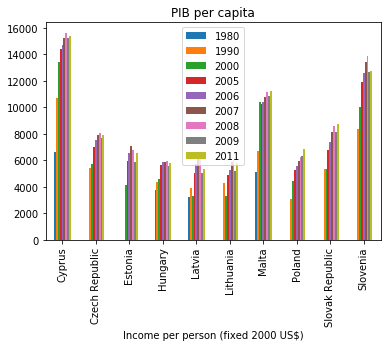

In [28]:
PIB_country.loc[:,[1980,1990,2000,2005,2006,2007,2008,2009,2011]].plot.bar(title = "PIB per capita");

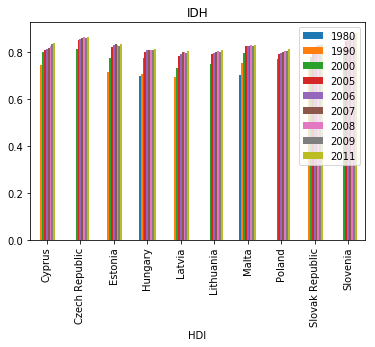

In [26]:
IDH_country.loc[:,[1980,1990,2000,2005,2006,2007,2008,2009,2011]].plot.bar(title = "IDH");

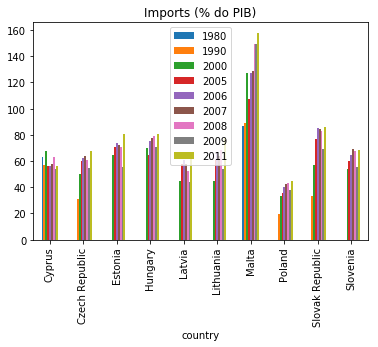

In [27]:
Imports_country.loc[:,[1980,1990,2000,2005,2006,2007,2008,2009,2011]].plot.bar(title = "Imports (% do PIB)");